# <font color='red'>SGD Algorithm to predict movie ratings</font>

# Task 1 Solutions

## Imports

In [1]:
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.utils.extmath import randomized_svd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

%matplotlib inline

## <font color='red'> Reading the csv file </font>

In [2]:
data=pd.read_csv('ratings_train.csv')
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [3]:
data.shape

(89992, 3)

## <font color='red'>Create your adjacency matrix </font>

In [4]:
M = data['user_id'].max() + 1
N = data['item_id'].max() + 1
adjacency_matrix = csr_matrix((data['rating'].values, (data['user_id'].values, data['item_id'].values)), shape=(M,N))

<font color='cyan'>Grader function - 1</font>

In [5]:
def grader_matrix(matrix):
    assert(matrix.shape==(943,1681))
    return True
grader_matrix(adjacency_matrix)

True

## <font color='red'> SVD decompostion</font>

Sample code for SVD decompostion

In [6]:
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(20, 5)
(5,)
(10, 5)


## <font color='red'>Write your code for SVD decompostion</font>

In [7]:
# Please use adjacency_matrix as matrix for SVD decompostion
# You can choose n_components as your choice
U, Sigma, VT = randomized_svd(adjacency_matrix, n_components=100,n_iter=5, random_state=42)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(943, 100)
(100,)
(1681, 100)


## <font color='red'>Compute mean of ratings</font>

In [8]:
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    # you can use mean() function to do this
    # check this (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) link for more details.
    return np.mean(ratings)

In [9]:
mu=m_u(data['rating'])
print(mu)

3.529480398257623


<font color='cyan'>Grader function -2 </font>

In [10]:
def grader_mean(mu):
    assert(np.round(mu,3)==3.529)
    return True
mu=m_u(data['rating'])
grader_mean(mu)

True

##  Initialize
Initialize ${ B_{i}} $ and $ {C_{j}} $

Hint : Number of rows of adjacent matrix corresponds to user dimensions($B_{i}$), number of columns of adjacent matrix corresponds to movie dimensions ($C_{j}$)

In [11]:
def initialize(dim):
    '''In this function, we will initialize bias value 'B' and 'C'.'''
    # initalize the value to zeros 
    # return output as a list of zeros 
    return np.zeros(shape=dim)

In [12]:
dim= (943,1) # give the number of dimensions for b_i (Here b_i corresponds to users)
b_i=initialize(dim)

In [13]:
dim= (1681,1)
# give the number of dimensions for c_j (Here c_j corresponds to movies)
c_j=initialize(dim)

<font color='cyan'>Grader function -3 </font>

In [14]:
def grader_dim(b_i,c_j):
    assert(len(b_i)==943 and np.sum(b_i)==0)
    assert(len(c_j)==1681 and np.sum(c_j)==0)
    return True
grader_dim(b_i,c_j)

True

## <font color='red'>Compute dL/db_i</font>

In [15]:
def derivative_db(user_id,item_id,rating,U,V,mu,alpha):
    '''In this function, we will compute dL/db_i'''
    return -2 * (rating - mu - b_i[user_id] - c_j[item_id] - np.dot(U[user_id], V[:, item_id])) + 2 * alpha * (b_i[user_id])
     


<font color='cyan'>Grader function -4 </font>

In [16]:
def grader_db(value):
    assert(np.round(value,3)==-0.931)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
alpha=0.01 
value=derivative_db(312,98,4,U1,V1,mu,alpha)
grader_db(value)

True

## <font color='red'>Compute dL/dc_j</font>

In [17]:
def derivative_dc(user_id,item_id,rating,U,V,mu, alpha):
    '''In this function, we will compute dL/dc_j'''
    return -2 * (rating - mu - b_i[user_id] - c_j[item_id] - np.dot(U[user_id], V[:, item_id])) + 2 * alpha * (c_j[item_id])


<font color='cyan'>Grader function - 5 </font>

In [18]:
def grader_dc(value):
    assert(np.round(value,3)==-2.929)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
r=0.01 
value=derivative_dc(58,504,5,U1,V1,mu,alpha)
grader_dc(value)

True

## <font color='red'>Compute MSE (mean squared error) for predicted ratings</font>

for each epoch, print the MSE value

In [19]:
epochs = range(1,100)
alpha=0.9
learning_rate = 0.09
loss = []
n = data.shape[0]
for epoch in epochs:
    temp_loss = 0
    if len(loss) >= 2 and (loss[-2] - loss[-1]) <= 10**-5:
        print(loss[-1], loss[-2], loss[-1] - loss[-2])
        break
    for user, movie, ratings in data.values:
        b_i[user] = b_i[user] - learning_rate * derivative_db(user, movie, ratings, U , VT, mu, alpha)
        c_j[movie] = c_j[movie] - learning_rate * derivative_dc(user, movie, ratings, U , VT, mu, alpha)
        y_pred = mu + b_i[user] + c_j[movie] + np.dot(U[user], VT[:, movie])
        temp_loss += (ratings - y_pred)**2
    
    print(temp_loss/n)
    loss.append(temp_loss/n)


[0.48112105]
[0.47509623]
[0.4746602]
[0.47448255]
[0.47439018]
[0.47433664]
[0.47430369]
[0.47428264]
[0.47426885]
[0.47425968]
[0.47425968] [0.47426885] [-9.17611467e-06]


## <font color='red'>Plot epoch number vs MSE </font>

* epoch number on X-axis
* MSE on Y-axis

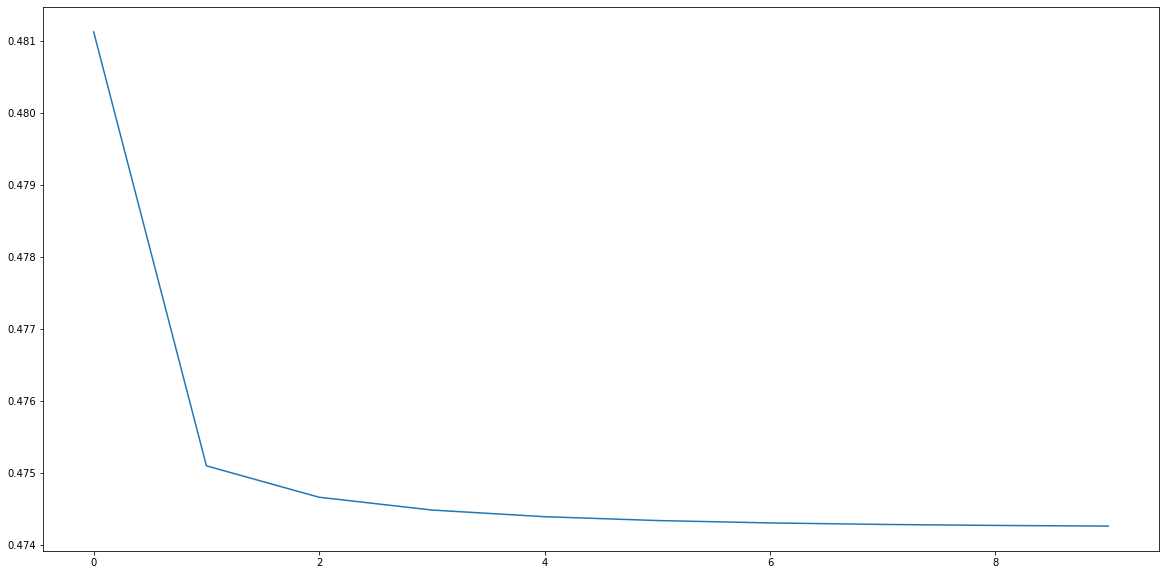

In [20]:
_, ax = plt.subplots(1, 1, figsize=(20,10))
ax.plot(loss)
plt.show()

<br>

# <font color='red'> Task 2</font>

In [21]:
df = pd.read_csv("user_info.csv.txt")
df.shape

(943, 4)

In [22]:
df.head()

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3
3,3,24,1,4
4,4,33,0,5


In [23]:
x_train = []
y_train = []
for ele,lab in zip(df['user_id'].values, df['is_male'].values):
    x_train.append(U[ele])
    y_train.append(lab)

In [24]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [25]:
x_train.shape

(943, 100)

In [26]:
y_train.shape

(943,)

In [30]:
clf = LogisticRegression(C=0.09)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_train)
conf = confusion_matrix(y_train, y_pred)
acc  = accuracy_score(y_train, y_pred)

In [31]:
conf

array([[  0, 273],
       [  0, 670]])

In [32]:
acc

0.7104984093319194

- Conclusion : By Scaling the feature vector of U does not affect the prediction of is_male as a target feature